# Import Libs

Data is taken from https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies

In [1]:
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# df = pd.read_csv("TMDB_movie_dataset_v11.csv")
df = pd.read_parquet("TMDB_movie_dataset_v11.parquet")

In [79]:
df.info()
df.head(3)
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149756 entries, 0 to 1149755
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1149756 non-null  int64  
 1   title                 1149743 non-null  object 
 2   vote_average          1149756 non-null  float64
 3   vote_count            1149756 non-null  int64  
 4   status                1149756 non-null  object 
 5   release_date          957097 non-null   object 
 6   revenue               1149756 non-null  int64  
 7   runtime               1149756 non-null  int64  
 8   adult                 1149756 non-null  bool   
 9   backdrop_path         303995 non-null   object 
 10  budget                1149756 non-null  int64  
 11  homepage              121470 non-null   object 
 12  imdb_id               605972 non-null   object 
 13  original_language     1149756 non-null  object 
 14  original_title        1149743 non-

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."


Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'keywords'],
      dtype='object')

# Data Cleaning

In [102]:
# Drop columns that are not needed
columns_to_drop = ['backdrop_path', 'homepage', 'tagline', 'keywords']
df.drop(columns=columns_to_drop, inplace=True)

In [103]:
# Looking at duplicates
df[df.duplicated(subset=['id', 'title'])].shape
df.drop_duplicates(subset=['id', 'title'], inplace=True)
df.shape

(0, 20)

(1149024, 20)

In [104]:
# Identify columns with missing values
missing = df.isna().sum().to_frame(name='val').reset_index(names='cols')
missing_cols = missing[missing['val'] > 0]['cols']
missing_cols

1                    title
5             release_date
10                 imdb_id
12          original_title
13                overview
15             poster_path
16                  genres
17    production_companies
18    production_countries
19        spoken_languages
Name: cols, dtype: object

In [105]:
for col in missing_cols:
    print(f"Column :{col}")
    df[df[col].isna()].iloc[[0]]
    print("-" * 50)

Column :title


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,imdb_id,original_language,original_title,overview,popularity,poster_path,genres,production_companies,production_countries,spoken_languages
408573,1104880,None,0.0,0,Canceled,None,0,0,False,0,None,en,None,None,0.6,/oXvQVlS7ZR7d5t130rVZH7ATxcQ.jpg,"Horror, Mystery, Thriller",None,United States of America,English


--------------------------------------------------
Column :release_date


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,imdb_id,original_language,original_title,overview,popularity,poster_path,genres,production_companies,production_countries,spoken_languages
15540,733668,Return,6.171,129,Released,None,0,18,False,0,None,hy,Return,Eyüp decides to cross mount Ararat looking for...,3.563,None,None,None,None,"Armenian, Kurdish"


--------------------------------------------------
Column :imdb_id


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,imdb_id,original_language,original_title,overview,popularity,poster_path,genres,production_companies,production_countries,spoken_languages
5347,567604,Once Upon a Deadpool,7.146,646,Released,2018-12-11,0,118,False,0,None,en,Once Upon a Deadpool,A kidnapped Fred Savage is forced to endure De...,23.001,/5Ka49BWWyKMXr93YMbH5wLN7aAM.jpg,"Comedy, Action, Adventure","20th Century Fox, Genre Films, Maximum Effort",United States of America,English


--------------------------------------------------
Column :original_title


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,imdb_id,original_language,original_title,overview,popularity,poster_path,genres,production_companies,production_countries,spoken_languages
408573,1104880,None,0.0,0,Canceled,None,0,0,False,0,None,en,None,None,0.6,/oXvQVlS7ZR7d5t130rVZH7ATxcQ.jpg,"Horror, Mystery, Thriller",None,United States of America,English


--------------------------------------------------
Column :overview


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,imdb_id,original_language,original_title,overview,popularity,poster_path,genres,production_companies,production_countries,spoken_languages
7637,42436,Natale in crociera,4.935,387,Released,2007-12-14,0,103,False,0,tt1065329,it,Natale in crociera,None,5.52,/n83LsfQCPReYembtNtuGwqUkUOS.jpg,Comedy,Filmauro,Italy,Italian


--------------------------------------------------
Column :poster_path


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,imdb_id,original_language,original_title,overview,popularity,poster_path,genres,production_companies,production_countries,spoken_languages
5531,836466,Return,6.291,619,Released,2020-06-10,0,12,False,0,None,en,Return,A single man has worked most of his life in a ...,7.915,None,Animation,None,None,None


--------------------------------------------------
Column :genres


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,imdb_id,original_language,original_title,overview,popularity,poster_path,genres,production_companies,production_countries,spoken_languages
6011,320367,Return,6.223,551,Released,2015-01-01,0,0,False,0,tt4299612,en,Return,A tale of terror. Cathy Reed has been institut...,4.037,None,None,None,None,None


--------------------------------------------------
Column :production_companies


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,imdb_id,original_language,original_title,overview,popularity,poster_path,genres,production_companies,production_countries,spoken_languages
3135,26736,Wizards of Waverly Place: The Movie,6.626,1325,Released,2009-08-28,0,94,False,0,tt1369845,en,Wizards of Waverly Place: The Movie,A young wizard accidentally conjures a spell t...,28.584,/reHGWHlF5tHwFQiFmsWHn9gwIpq.jpg,"Family, TV Movie, Adventure, Comedy, Drama, Fa...",None,United States of America,English


--------------------------------------------------
Column :production_countries


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,imdb_id,original_language,original_title,overview,popularity,poster_path,genres,production_companies,production_countries,spoken_languages
813,27576,Salt,6.398,5109,Released,2010-07-21,293329073,100,False,110000000,tt0944835,en,Salt,"As a CIA officer, Evelyn Salt swore an oath to...",31.472,/ppXyhOe8UCEOrBRSYqE3SkHwrcR.jpg,"Action, Mystery, Thriller","Wintergreen Productions, Columbia Pictures, Re...",None,"English, Russian, Korean"


--------------------------------------------------
Column :spoken_languages


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,imdb_id,original_language,original_title,overview,popularity,poster_path,genres,production_companies,production_countries,spoken_languages
1827,594767,Shazam! Fury of the Gods,6.662,2416,Released,2023-03-15,133437105,130,False,125000000,tt10151854,en,Shazam! Fury of the Gods,"Billy Batson and his foster siblings, who tran...",143.169,/A3ZbZsmsvNGdprRi2lKgGEeVLEH.jpg,"Comedy, Action, Fantasy","New Line Cinema, The Safran Company, DC Films",United States of America,None


--------------------------------------------------


## Missing Values

In [106]:
# Handle missing values
df['genres'] = df['genres'].fillna('Unknown')
df['production_companies'] = df['production_companies'].fillna('Unknown')
df['production_countries'] = df['production_countries'].fillna('Unknown')
df['spoken_languages'] = df['spoken_languages'].fillna('Unknown')
df['title'] = df['title'].fillna('Untitled')
df['original_title'] = df['original_title'].fillna('Untitled')
df['imdb_id'] = df['imdb_id'].fillna('Unknown')
df['overview'] = df['overview'].fillna('Unknown')
df['poster_path'] = df['poster_path'].fillna('Unknown')
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

In [107]:
# Identify columns with missing values
missing = df.isna().sum().to_frame(name='val').reset_index(names='cols')
missing

# Missing cols
missing_cols = missing[missing['val'] > 0]
missing_cols

,cols,val
0,id,0
1,title,0
2,vote_average,0
3,vote_count,0
4,status,0
5,release_date,192207
6,revenue,0
7,runtime,0
8,adult,0
9,budget,0


,cols,val
5,release_date,192207


In [108]:
# Checking release_date
df[df['release_date'].isna()]['release_date']
#  Drop Rows with NaT Values
df = df.dropna(subset=['release_date'])

15540     NaT
15897     NaT
30049     NaT
33644     NaT
33647     NaT
           ..
1149748   NaT
1149750   NaT
1149752   NaT
1149754   NaT
1149755   NaT
Name: release_date, Length: 192207, dtype: datetime64[ns]

In [109]:
# Identify columns with missing values
missing = df.isna().sum().to_frame(name='val').reset_index(names='cols')
missing

# Missing cols
missing_cols = missing[missing['val'] > 0]
missing_cols

,cols,val
0,id,0
1,title,0
2,vote_average,0
3,vote_count,0
4,status,0
5,release_date,0
6,revenue,0
7,runtime,0
8,adult,0
9,budget,0


,cols,val


# Feature Creation

In [110]:
# Extract new features
df.loc[:, 'release_year'] = df['release_date'].dt.year
df.loc[:, 'release_month'] = df['release_date'].dt.month
df.loc[:, 'release_day'] = df['release_date'].dt.day

# Optimize data types with .loc
df.loc[:, 'original_language'] = df['original_language'].astype('category')
df.loc[:, 'genres'] = df['genres'].astype('category')
df.loc[:, 'status'] = df['status'].astype('category')

In [11]:
# Create new columns for revenue, budget, profit, profitability_ratio in million USD
df['revenue_musd'] = df['revenue'] / 1_000_000
df['budget_musd'] = df['budget'] / 1_000_000
df['profit_musd'] =  df['revenue_musd'] - df['budget_musd']
df['profitability_ratio'] = df['revenue_musd'] / df['budget_musd']

In [12]:
df.to_parquet("TMDB_movie_dataset_v11_cleaned.parquet")

# EDA

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [13]:
df = pd.read_parquet("TMDB_movie_dataset_v11_cleaned.parquet")

In [19]:
df.shape

(956817, 27)

## Movie Release Trend Over the Years

release_year
1800    2
1837    1
1865    3
1867    1
1874    1
       ..
2055    1
2057    1
2061    1
2074    1
2099    1
Name: count, Length: 164, dtype: int64

release_year
2026    68
2027    23
2029     9
2028     7
2030     4
2031     2
2034     2
2037     1
2074     1
2032     1
2061     1
2055     1
2057     1
2040     1
2043     1
2099     1
Name: count, dtype: int64

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='release_year'>

Text(0.5, 1.0, 'Movie Releases Over the Years')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Number of Movies')

(array([1750., 1800., 1850., 1900., 1950., 2000., 2050., 2100., 2150.]),
 [Text(1750.0, 0, '1750'),
  Text(1800.0, 0, '1800'),
  Text(1850.0, 0, '1850'),
  Text(1900.0, 0, '1900'),
  Text(1950.0, 0, '1950'),
  Text(2000.0, 0, '2000'),
  Text(2050.0, 0, '2050'),
  Text(2100.0, 0, '2100'),
  Text(2150.0, 0, '2150')])

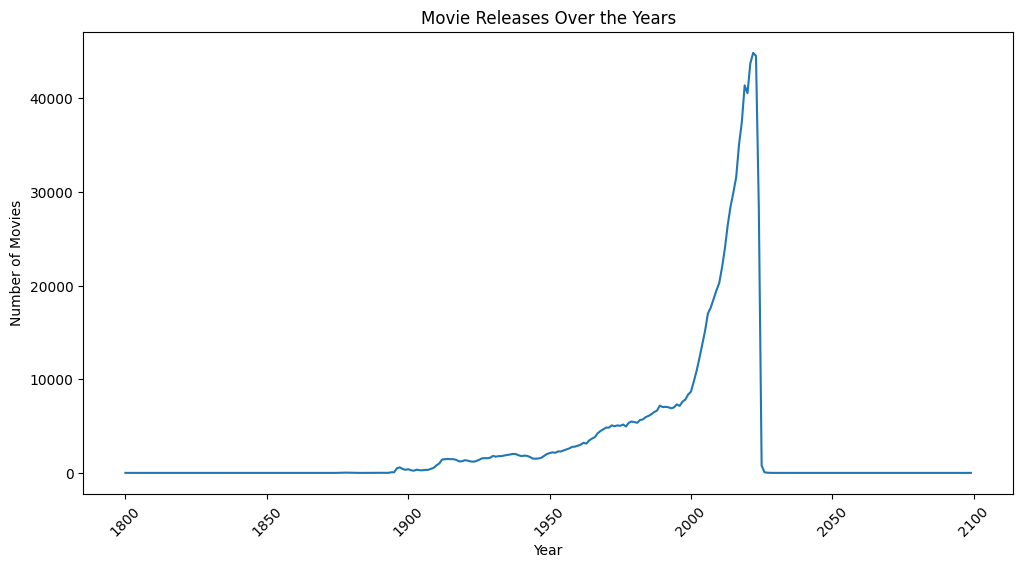

In [14]:
# Movie release trend over the years
df['release_year'].value_counts().sort_index()
df[df['release_year'] > 2025]['release_year'].value_counts()

releases = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(12,6))

sns.lineplot(x=releases.index,
             y=releases.values)

plt.title('Movie Releases Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

## Revenue vs. Budget

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='budget_musd', ylabel='revenue_musd'>

Text(0.5, 1.0, 'Revenue  vs. Budget')

Text(0.5, 0, 'Budget (million USD)')

Text(0, 0.5, 'Revenue (million USD)')

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000.]),
 [Text(-200.0, 0, '−200'),
  Text(0.0, 0, '0'),
  Text(200.0, 0, '200'),
  Text(400.0, 0, '400'),
  Text(600.0, 0, '600'),
  Text(800.0, 0, '800'),
  Text(1000.0, 0, '1000')])

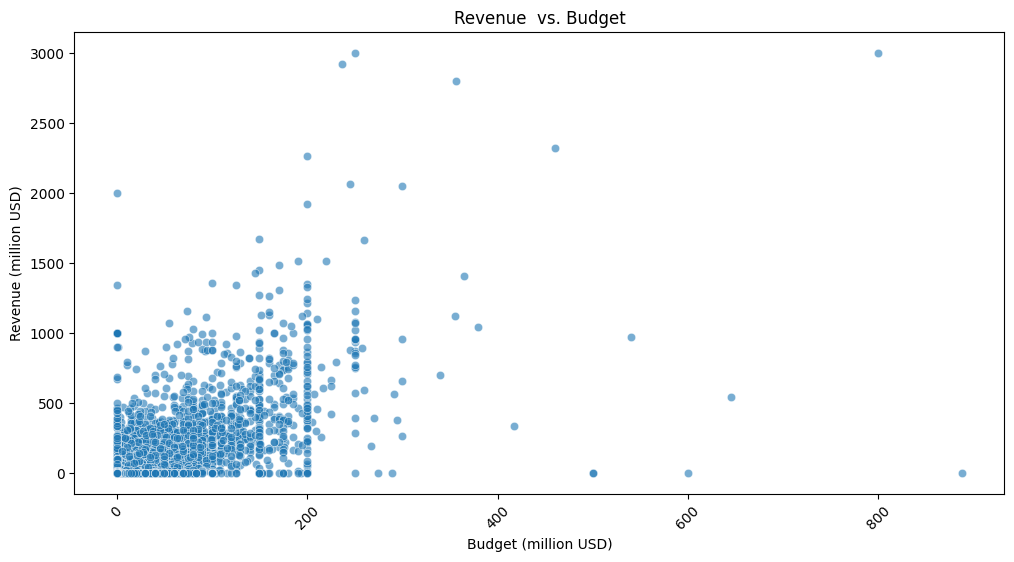

In [15]:
# Revenue vs. Budget
plt.figure(figsize=(12,6))
sns.scatterplot(x='budget_musd',
                y='revenue_musd',
                data=df,
                alpha=0.6)

plt.title('Revenue  vs. Budget')
plt.xlabel('Budget (million USD)')
plt.ylabel('Revenue (million USD)')
plt.xticks(rotation=45)
plt.show()

## Genre Distribution

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='genres'>

Text(0.5, 1.0, 'Genre Distribution')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37],
 [Text(0, 0, 'Drama'),
  Text(1, 0, 'Documentary'),
  Text(2, 0, 'Comedy'),
  Text(3, 0, ' Drama'),
  Text(4, 0, 'Animation'),
  Text(5, 0, ' Comedy'),
  Text(6, 0, 'Horror'),
  Text(7, 0, ' Romance'),
  Text(8, 0, 'Music'),
  Text(9, 0, 'Action'),
  Text(10, 0, ' Thriller'),
  Text(11, 0, 'Romance'),
  Text(12, 0, ' Crime'),
  Text(13, 0, ' TV Movie'),
  Text(14, 0, ' Family'),
  Text(15, 0, 'Thriller'),
  Text(16, 0, ' Music'),
  Text(17, 0, ' Horror'),
  Text(18, 0, 'Crime'),
  Text(19, 0, ' Fantasy'),
  Text(20, 0, ' Action'),
  Text(21, 0, ' Adventure'),
  Text(22, 0, ' Mystery'),
  Text(23, 0, ' History'),
  Text(24, 0, ' Science Fiction'),
  Text(25, 0, 'Family'),
  Text(26, 0, ' Documentary'),
  Text(27, 0, 'Adventure'),
  Text(28, 0, ' Animation'),
  Text(29, 0,

Text(0.5, 0, 'Genre')

Text(0, 0.5, 'Count')

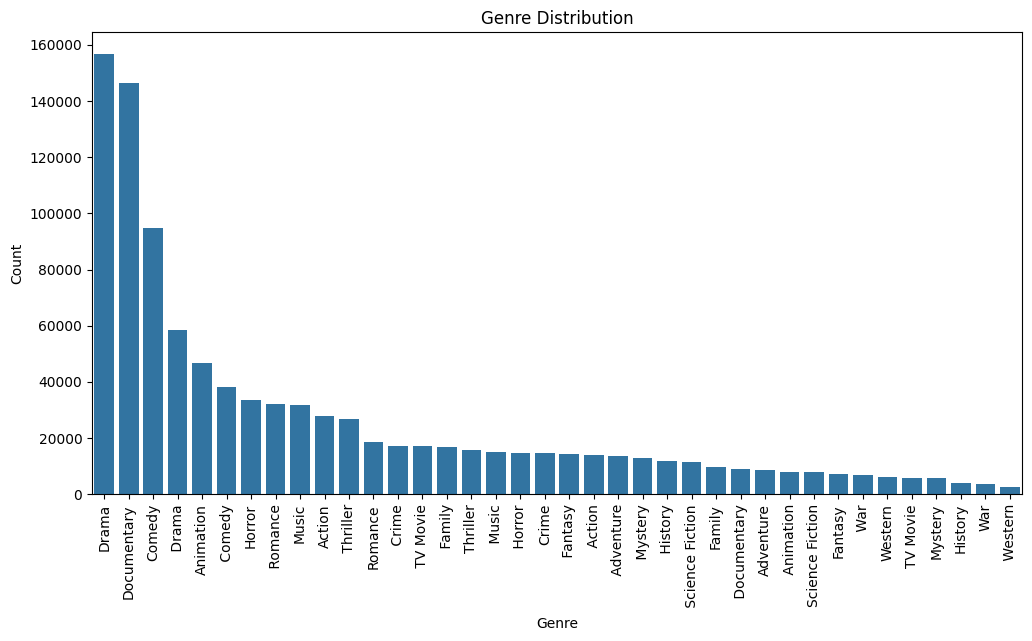

In [16]:
genre_count = df['genres'].str.split(',').explode().value_counts()
genre_count = genre_count.drop(index='Unknown')
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_count.index, y=genre_count.values)
plt.title('Genre Distribution')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

### Genre vs Total Revenue

In [40]:
# Split genres into a list of genres
df['genres_list'] = df['genres'].str.split(',')

# # Explode the list into separate rows
df_exploded = df.explode('genres_list')

# # Rename for clarity
df_exploded.rename(columns={'genres_list': 'genre'}, inplace=True)


In [41]:
# Calculate total and average revenue for each genre
genre_revenue = df_exploded.groupby('genre')['revenue_musd'].agg(['sum', 'mean', 'count']).reset_index()

# Sort by total revenue for better visualization
genre_revenue = genre_revenue.sort_values(by='sum', ascending=False)


<Figure size 1200x600 with 0 Axes>

C:\Users\Matthew\AppData\Local\Temp\ipykernel_18704\1142813945.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_revenue, x='genre', y='sum', palette='viridis')


<Axes: xlabel='genre', ylabel='sum'>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38],
 [Text(0, 0, ' Adventure'),
  Text(1, 0, 'Action'),
  Text(2, 0, ' Comedy'),
  Text(3, 0, ' Thriller'),
  Text(4, 0, ' Action'),
  Text(5, 0, ' Drama'),
  Text(6, 0, ' Fantasy'),
  Text(7, 0, ' Science Fiction'),
  Text(8, 0, ' Family'),
  Text(9, 0, 'Comedy'),
  Text(10, 0, 'Adventure'),
  Text(11, 0, 'Drama'),
  Text(12, 0, ' Romance'),
  Text(13, 0, ' Crime'),
  Text(14, 0, 'Animation'),
  Text(15, 0, ' Mystery'),
  Text(16, 0, ' Animation'),
  Text(17, 0, 'Horror'),
  Text(18, 0, 'Science Fiction'),
  Text(19, 0, 'Fantasy'),
  Text(20, 0, 'Family'),
  Text(21, 0, ' History'),
  Text(22, 0, 'Thriller'),
  Text(23, 0, ' War'),
  Text(24, 0, ' Horror'),
  Text(25, 0, 'Crime'),
  Text(26, 0, ' Music'),
  Text(27, 0, 'Romance'),
  Text(28, 0, 'Mystery'),
  Text(29, 

Text(0.5, 1.0, 'Total Revenue by Genre')

Text(0.5, 0, 'Genre')

Text(0, 0.5, 'Total Revenue (in million USD)')

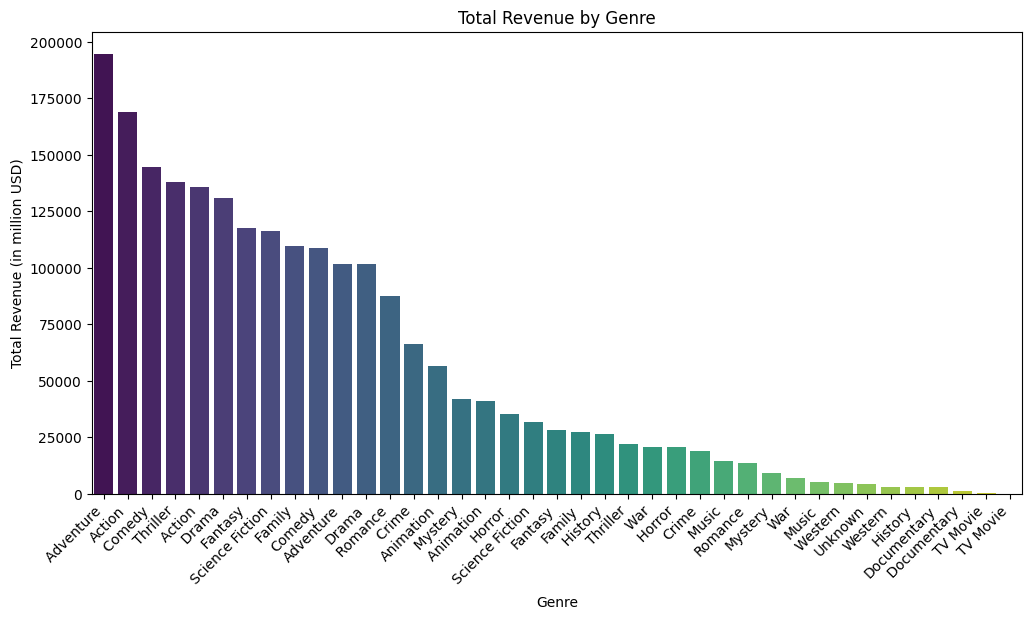

In [44]:
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_revenue, x='genre', y='sum', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Total Revenue by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Revenue (in million USD)')
plt.show()

### Average Revenue

<Figure size 1200x600 with 0 Axes>

C:\Users\Matthew\AppData\Local\Temp\ipykernel_18704\2817241977.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_revenue.sort_values(by='mean', ascending=False), x='genre', y='mean', palette='coolwarm')


<Axes: xlabel='genre', ylabel='mean'>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38],
 [Text(0, 0, ' Adventure'),
  Text(1, 0, 'Adventure'),
  Text(2, 0, ' Science Fiction'),
  Text(3, 0, ' Action'),
  Text(4, 0, ' Fantasy'),
  Text(5, 0, ' Family'),
  Text(6, 0, 'Action'),
  Text(7, 0, ' Animation'),
  Text(8, 0, ' Thriller'),
  Text(9, 0, 'Science Fiction'),
  Text(10, 0, 'Fantasy'),
  Text(11, 0, ' Crime'),
  Text(12, 0, ' Comedy'),
  Text(13, 0, ' Mystery'),
  Text(14, 0, ' War'),
  Text(15, 0, 'Family'),
  Text(16, 0, ' Romance'),
  Text(17, 0, ' History'),
  Text(18, 0, ' Drama'),
  Text(19, 0, 'War'),
  Text(20, 0, ' Western'),
  Text(21, 0, 'Mystery'),
  Text(22, 0, ' Horror'),
  Text(23, 0, 'Thriller'),
  Text(24, 0, 'Crime'),
  Text(25, 0, 'Animation'),
  Text(26, 0, 'Comedy'),
  Text(27, 0, 'Horror'),
  Text(28, 0, ' Music'),
  Text(29, 0

Text(0.5, 1.0, 'Average Revenue by Genre')

Text(0.5, 0, 'Genre')

Text(0, 0.5, 'Average Revenue (in million USD)')

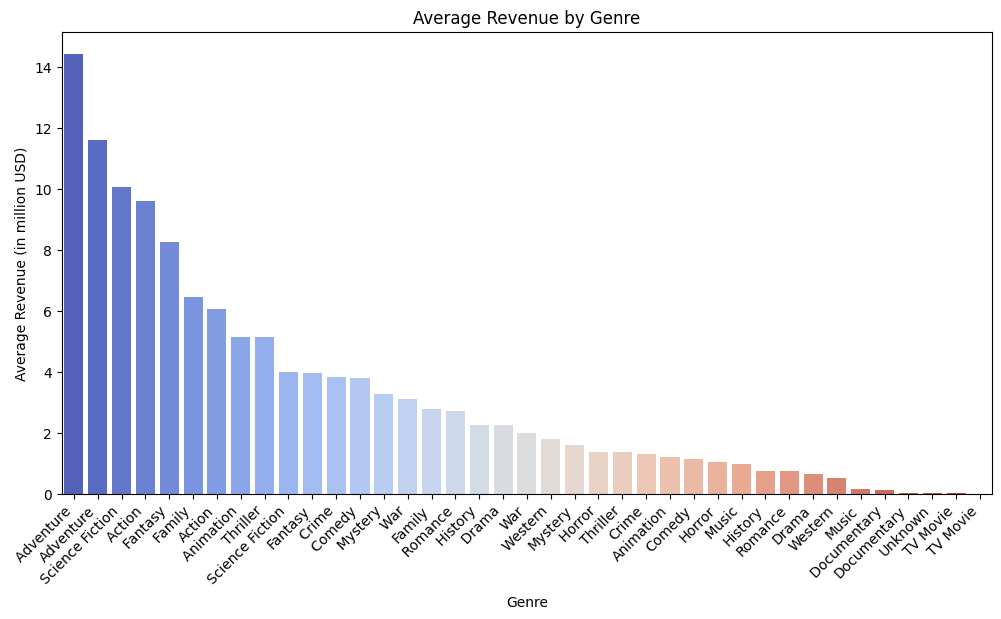

In [47]:
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_revenue.sort_values(by='mean', ascending=False), x='genre', y='mean', palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title('Average Revenue by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Revenue (in million USD)')
plt.show()